In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/ishare.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2014-06-12,37.944145,37.997395,37.944145,37.997395,10200
1,2014-06-13,37.966961,37.966961,37.921317,37.966961,2600
2,2014-06-14,NaN,NaN,NaN,NaN,0
3,2014-06-15,NaN,NaN,NaN,NaN,0
4,2014-06-16,37.769174,37.784386,37.769174,37.784386,1000
...,...,...,...,...,...,...
3572,2024-03-23,NaN,NaN,NaN,NaN,0
3573,2024-03-24,NaN,NaN,NaN,NaN,0
3574,2024-03-25,57.500000,57.764999,57.500000,57.549999,245800
3575,2024-03-26,57.830002,57.875000,57.630001,57.650002,1586900


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2014-06-12,37.944145,37.997395,37.944145,37.997395,10200
1,2014-06-13,37.966961,37.966961,37.921317,37.966961,2600
2,2014-06-16,37.769174,37.784386,37.769174,37.784386,1000
3,2014-06-17,37.563782,37.784386,37.563782,37.784386,1500
4,2014-06-18,37.875677,38.362530,37.875677,38.362530,25700
...,...,...,...,...,...,...
2460,2024-03-21,57.730000,57.840000,57.634998,57.639999,747900
2461,2024-03-22,57.610001,57.625000,57.450001,57.529999,301900
2462,2024-03-25,57.500000,57.764999,57.500000,57.549999,245800
2463,2024-03-26,57.830002,57.875000,57.630001,57.650002,1586900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2465 non-null   datetime64[ns]
 1   Open    2465 non-null   float64       
 2   High    2465 non-null   float64       
 3   Low     2465 non-null   float64       
 4   Close   2465 non-null   float64       
 5   Volume  2465 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 115.7 KB


In [6]:
df.shape


(2465, 6)

In [7]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

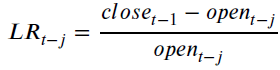

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [8]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b51

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2014-06-12,37.944145,37.997395,37.944145,37.997395,10200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-06-13,37.966961,37.966961,37.921317,37.966961,2600,0.001403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-06-16,37.769174,37.784386,37.769174,37.784386,1000,0.000000,0.000601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-06-17,37.563782,37.784386,37.563782,37.784386,1500,0.000403,-0.004809,-0.004210,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-06-18,37.875677,38.362530,37.875677,38.362530,25700,0.005873,0.000403,-0.004809,-0.004210,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-03-21,57.730000,57.840000,57.634998,57.639999,747900,0.012430,0.014028,0.008370,0.005215,-0.000346,0.050118,0.066489,0.133739,0.177180
2461,2024-03-22,57.610001,57.625000,57.450001,57.529999,301900,-0.001559,0.009104,0.010696,0.005057,0.001912,0.035387,0.060729,0.146024,0.174238
2462,2024-03-25,57.500000,57.764999,57.500000,57.549999,245800,-0.001389,-0.003464,0.007178,0.008767,0.003139,0.029528,0.056954,0.150629,0.166249
2463,2024-03-26,57.830002,57.875000,57.630001,57.650002,1586900,0.000870,-0.001042,-0.003118,0.007528,0.009118,0.029701,0.050758,0.168140,0.192144


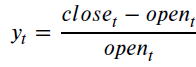

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [9]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2014-06-12,37.944145,37.997395,37.944145,37.997395,10200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001403
1,2014-06-13,37.966961,37.966961,37.921317,37.966961,2600,0.001403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,2014-06-16,37.769174,37.784386,37.769174,37.784386,1000,0.000000,0.000601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000403
3,2014-06-17,37.563782,37.784386,37.563782,37.784386,1500,0.000403,-0.004809,-0.004210,NaN,NaN,NaN,NaN,NaN,NaN,0.005873
4,2014-06-18,37.875677,38.362530,37.875677,38.362530,25700,0.005873,0.000403,-0.004809,-0.004210,NaN,NaN,NaN,NaN,NaN,0.012854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-03-21,57.730000,57.840000,57.634998,57.639999,747900,0.012430,0.014028,0.008370,0.005215,-0.000346,0.050118,0.066489,0.133739,0.177180,-0.001559
2461,2024-03-22,57.610001,57.625000,57.450001,57.529999,301900,-0.001559,0.009104,0.010696,0.005057,0.001912,0.035387,0.060729,0.146024,0.174238,-0.001389
2462,2024-03-25,57.500000,57.764999,57.500000,57.549999,245800,-0.001389,-0.003464,0.007178,0.008767,0.003139,0.029528,0.056954,0.150629,0.166249,0.000870
2463,2024-03-26,57.830002,57.875000,57.630001,57.650002,1586900,0.000870,-0.001042,-0.003118,0.007528,0.009118,0.029701,0.050758,0.168140,0.192144,-0.003113


In [10]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2015-06-12,36.262368,36.423159,36.047980,36.292995,30300,-0.004370,0.008430,0.021345,0.020256,0.017219,-0.012384,0.073111,0.062953,-0.034435,0.000845
253,2015-06-15,35.534983,35.985201,35.534983,35.979076,81100,0.000845,-0.013733,-0.001054,0.011740,0.010661,-0.031269,0.057092,0.064231,-0.044090,0.012497
254,2015-06-16,35.871880,36.047987,35.673571,36.040329,86300,0.012497,-0.007812,-0.022264,-0.009694,0.002989,-0.038273,0.044454,0.065483,-0.047396,0.004696
255,2015-06-17,36.040320,36.093917,35.657482,35.971409,39400,0.004696,0.014221,-0.006123,-0.020599,-0.008008,-0.038013,0.046000,0.077737,-0.040556,-0.001912
256,2015-06-18,36.109240,36.706466,36.086271,36.438480,39000,-0.001912,0.002775,0.012282,-0.008024,-0.022472,-0.035318,0.026212,0.105347,-0.050277,0.009118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-03-21,57.730000,57.840000,57.634998,57.639999,747900,0.012430,0.014028,0.008370,0.005215,-0.000346,0.050118,0.066489,0.133739,0.177180,-0.001559
2461,2024-03-22,57.610001,57.625000,57.450001,57.529999,301900,-0.001559,0.009104,0.010696,0.005057,0.001912,0.035387,0.060729,0.146024,0.174238,-0.001389
2462,2024-03-25,57.500000,57.764999,57.500000,57.549999,245800,-0.001389,-0.003464,0.007178,0.008767,0.003139,0.029528,0.056954,0.150629,0.166249,0.000870
2463,2024-03-26,57.830002,57.875000,57.630001,57.650002,1586900,0.000870,-0.001042,-0.003118,0.007528,0.009118,0.029701,0.050758,0.168140,0.192144,-0.003113


In [11]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (1549, 9)
y_train:  (1549,)
x_valid:  (331, 9)
y_valid:  (331,)
x_test:  (333, 9)
y_test:  (333,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_svr = grid_search.best_estimator_

In [15]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 0.1, 'epsilon': 0.001, 'gamma': 0.0001}


In [16]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [17]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 0.1, 'epsilon': 0.001, 'gamma': 0.0001}


In [18]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [19]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.006533504577098678
Validation RMSE (SVR):  0.00919318636784528
Test RMSE (SVR):  0.005786029198400023


In [20]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-20-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
1801,2021-08-06,54.657601,54.717837,54.481527,54.601997,364800,0.000507,0.001015,0.006634,0.009553,0.012836,0.040253,0.040548,0.148163,0.336922,-0.001017,0.000101
1802,2021-08-09,54.583471,54.602003,54.472263,54.546402,312300,-0.001017,-0.003889,-0.003383,0.002211,0.005118,0.025052,0.024791,0.135090,0.338424,-0.000679,0.000102
1803,2021-08-10,54.611267,54.666871,54.564932,54.611267,922400,-0.000679,-0.002034,-0.004903,-0.004398,0.001191,0.016229,0.049836,0.134149,0.329694,0.000000,0.000102
1804,2021-08-11,54.963425,55.060729,54.861486,55.046829,1302100,0.000000,0.000509,-0.000848,-0.003719,-0.003214,0.018317,0.049977,0.127577,0.306792,0.001517,0.000099
1805,2021-08-12,55.000487,55.083892,54.917083,55.056091,318200,0.001517,0.007976,0.008489,0.007121,0.004227,0.024845,0.063392,0.137857,0.309847,0.001011,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2022-11-21,44.900498,45.059039,44.765980,44.948540,652900,-0.002331,0.016843,-0.001272,-0.012788,-0.000424,0.165883,0.044124,-0.030773,-0.170779,0.001070,0.000032
2128,2022-11-22,45.179146,45.592312,45.159929,45.592312,914800,0.001070,-0.008898,0.010149,-0.007847,-0.019287,0.125060,0.039094,-0.042358,-0.170319,0.009145,0.000034
2129,2022-11-23,45.698007,46.188039,45.698007,46.130386,404400,0.009145,0.015408,0.005297,0.024617,0.006363,0.129224,0.046768,-0.021196,-0.150590,0.009462,0.000035
2130,2022-11-25,46.168821,46.509922,46.159214,46.389816,331000,0.009462,0.021055,0.027391,0.017161,0.036709,0.123041,0.050087,-0.022267,-0.128071,0.004787,0.000037


In [21]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-21-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
1801,2021-08-06,54.657601,54.717837,54.481527,54.601997,364800,0.000507,0.001015,0.006634,0.009553,0.012836,0.040253,0.040548,0.148163,0.336922,-0.001017,0.000101,54.663096
1802,2021-08-09,54.583471,54.602003,54.472263,54.546402,312300,-0.001017,-0.003889,-0.003383,0.002211,0.005118,0.025052,0.024791,0.135090,0.338424,-0.000679,0.000102,54.589047
1803,2021-08-10,54.611267,54.666871,54.564932,54.611267,922400,-0.000679,-0.002034,-0.004903,-0.004398,0.001191,0.016229,0.049836,0.134149,0.329694,0.000000,0.000102,54.616817
1804,2021-08-11,54.963425,55.060729,54.861486,55.046829,1302100,0.000000,0.000509,-0.000848,-0.003719,-0.003214,0.018317,0.049977,0.127577,0.306792,0.001517,0.000099,54.968842
1805,2021-08-12,55.000487,55.083892,54.917083,55.056091,318200,0.001517,0.007976,0.008489,0.007121,0.004227,0.024845,0.063392,0.137857,0.309847,0.001011,0.000098,55.005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2022-11-21,44.900498,45.059039,44.765980,44.948540,652900,-0.002331,0.016843,-0.001272,-0.012788,-0.000424,0.165883,0.044124,-0.030773,-0.170779,0.001070,0.000032,44.901914
2128,2022-11-22,45.179146,45.592312,45.159929,45.592312,914800,0.001070,-0.008898,0.010149,-0.007847,-0.019287,0.125060,0.039094,-0.042358,-0.170319,0.009145,0.000034,45.180690
2129,2022-11-23,45.698007,46.188039,45.698007,46.130386,404400,0.009145,0.015408,0.005297,0.024617,0.006363,0.129224,0.046768,-0.021196,-0.150590,0.009462,0.000035,45.699588
2130,2022-11-25,46.168821,46.509922,46.159214,46.389816,331000,0.009462,0.021055,0.027391,0.017161,0.036709,0.123041,0.050087,-0.022267,-0.128071,0.004787,0.000037,46.170539


In [22]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=07617a2fd18383b4cb95b9852ef218f40dcc564fec61fb6bb0500438f0578b93
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [23]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0000 ± 0.0001,LR_126
0.0000 ± 0.0000,LR_21
0.0000 ± 0.0000,LR_5
-0.0000 ± 0.0000,LR_1
-0.0000 ± 0.0000,LR_2
-0.0000 ± 0.0000,LR_63
-0.0000 ± 0.0000,LR_3
-0.0000 ± 0.0000,LR_4
-0.0006 ± 0.0005,LR_252


In [24]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_126', 'LR_21', 'LR_5', 'LR_1', 'LR_2', 'LR_63', 'LR_3', 'LR_4', 'LR_252']


In [25]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
1801,2021-08-06,54.657601,54.717837,54.481527,54.601997,364800,0.000507,0.001015,0.006634,0.009553,0.012836,0.040253,0.040548,0.148163,0.336922,-0.001017
1802,2021-08-09,54.583471,54.602003,54.472263,54.546402,312300,-0.001017,-0.003889,-0.003383,0.002211,0.005118,0.025052,0.024791,0.135090,0.338424,-0.000679
1803,2021-08-10,54.611267,54.666871,54.564932,54.611267,922400,-0.000679,-0.002034,-0.004903,-0.004398,0.001191,0.016229,0.049836,0.134149,0.329694,0.000000
1804,2021-08-11,54.963425,55.060729,54.861486,55.046829,1302100,0.000000,0.000509,-0.000848,-0.003719,-0.003214,0.018317,0.049977,0.127577,0.306792,0.001517
1805,2021-08-12,55.000487,55.083892,54.917083,55.056091,318200,0.001517,0.007976,0.008489,0.007121,0.004227,0.024845,0.063392,0.137857,0.309847,0.001011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2022-11-21,44.900498,45.059039,44.765980,44.948540,652900,-0.002331,0.016843,-0.001272,-0.012788,-0.000424,0.165883,0.044124,-0.030773,-0.170779,0.001070
2128,2022-11-22,45.179146,45.592312,45.159929,45.592312,914800,0.001070,-0.008898,0.010149,-0.007847,-0.019287,0.125060,0.039094,-0.042358,-0.170319,0.009145
2129,2022-11-23,45.698007,46.188039,45.698007,46.130386,404400,0.009145,0.015408,0.005297,0.024617,0.006363,0.129224,0.046768,-0.021196,-0.150590,0.009462
2130,2022-11-25,46.168821,46.509922,46.159214,46.389816,331000,0.009462,0.021055,0.027391,0.017161,0.036709,0.123041,0.050087,-0.022267,-0.128071,0.004787


In [26]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [29]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.0091903384324558


In [30]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

2.8479353894796805e-06

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [32]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126'): 0.009172427420254568, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63', 'LR_126'): 0.00917106058416883, ('LR_1', 'LR_2', 'LR_5', 'LR_21', 'LR_63', 'LR_126'): 0.009171360755963268, ('LR_1', 'LR_2', 'LR_5', 'LR_21', 'LR_126'): 0.009175964024451507, ('LR_1', 'LR_5', 'LR_21', 'LR_126'): 0.009179466533899948, ('LR_5', 'LR_21', 'LR_126'): 0.009189856588639666, ('LR_21', 'LR_126'): 0.00919042827781742, ('LR_126',): 0.009185095720158227}


In [33]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126'): 2.0758947590711688e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63', 'LR_126'): 2.2125783676449698e-05, ('LR_1', 'LR_2', 'LR_5', 'LR_21', 'LR_63', 'LR_126'): 2.1825611882011695e-05, ('LR_1', 'LR_2', 'LR_5', 'LR_21', 'LR_126'): 1.7222343393772516e-05, ('LR_1', 'LR_5', 'LR_21', 'LR_126'): 1.3719833945331772e-05, ('LR_5', 'LR_21', 'LR_126'): 3.3297792056130593e-06, ('LR_21', 'LR_126'): 2.758090027858706e-06, ('LR_126',): 8.090647687052088e-06}


In [34]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_1', 'LR_2', 'LR_3', 'LR_5', 'LR_21', 'LR_63', 'LR_126')
Maximum Loss Difference: 2.2125783676449698e-05


In [35]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-35-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.005716837628613678


In [38]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-38-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
2132,2022-11-29,45.784483,46.072738,45.678789,45.794090,452900,-0.009585,-0.010822,-0.000631,0.010846,0.017120,0.109477,0.063311,-0.049088,-0.130544,0.000210,0.000040,45.786298
2133,2022-11-30,46.226476,46.802984,45.726834,46.658859,793600,0.000210,-0.006876,-0.008117,0.002103,0.013611,0.111992,0.083182,-0.046300,-0.126934,0.009354,0.000040,46.228334
2134,2022-12-01,47.254586,47.369887,46.918290,47.120068,2909700,0.009354,0.019098,0.011878,0.010614,0.021026,0.111976,0.131144,-0.021589,-0.113735,-0.002847,0.000040,47.256494
2135,2022-12-02,46.831809,47.350665,46.831809,47.225758,482700,-0.002847,0.019331,0.029171,0.021880,0.020604,0.138347,0.126838,-0.014442,-0.094777,0.008412,0.000041,46.833739
2136,2022-12-05,47.177714,47.273801,46.610813,46.716507,652300,0.008412,-0.000610,0.021617,0.031480,0.024172,0.180639,0.136942,-0.021463,-0.098683,-0.009776,0.000039,47.179563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-03-21,57.730000,57.840000,57.634998,57.639999,747900,0.012430,0.014028,0.008370,0.005215,-0.000346,0.050118,0.066489,0.133739,0.177180,-0.001559,0.000079,57.734563
2461,2024-03-22,57.610001,57.625000,57.450001,57.529999,301900,-0.001559,0.009104,0.010696,0.005057,0.001912,0.035387,0.060729,0.146024,0.174238,-0.001389,0.000079,57.614560
2462,2024-03-25,57.500000,57.764999,57.500000,57.549999,245800,-0.001389,-0.003464,0.007178,0.008767,0.003139,0.029528,0.056954,0.150629,0.166249,0.000870,0.000078,57.504510
2463,2024-03-26,57.830002,57.875000,57.630001,57.650002,1586900,0.000870,-0.001042,-0.003118,0.007528,0.009118,0.029701,0.050758,0.168140,0.192144,-0.003113,0.000081,57.834715


In [39]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-39-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-40-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
2132,2022-11-29,45.784483,46.072738,45.678789,45.794090,452900,-0.009585,-0.010822,-0.000631,0.010846,0.017120,0.109477,0.063311,-0.049088,-0.130544,0.000210,0.000040,45.786298
2133,2022-11-30,46.226476,46.802984,45.726834,46.658859,793600,0.000210,-0.006876,-0.008117,0.002103,0.013611,0.111992,0.083182,-0.046300,-0.126934,0.009354,0.000040,46.228334
2134,2022-12-01,47.254586,47.369887,46.918290,47.120068,2909700,0.009354,0.019098,0.011878,0.010614,0.021026,0.111976,0.131144,-0.021589,-0.113735,-0.002847,0.000040,47.256494
2135,2022-12-02,46.831809,47.350665,46.831809,47.225758,482700,-0.002847,0.019331,0.029171,0.021880,0.020604,0.138347,0.126838,-0.014442,-0.094777,0.008412,0.000041,46.833739
2136,2022-12-05,47.177714,47.273801,46.610813,46.716507,652300,0.008412,-0.000610,0.021617,0.031480,0.024172,0.180639,0.136942,-0.021463,-0.098683,-0.009776,0.000039,47.179563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2024-03-21,57.730000,57.840000,57.634998,57.639999,747900,0.012430,0.014028,0.008370,0.005215,-0.000346,0.050118,0.066489,0.133739,0.177180,-0.001559,0.000079,57.734563
2461,2024-03-22,57.610001,57.625000,57.450001,57.529999,301900,-0.001559,0.009104,0.010696,0.005057,0.001912,0.035387,0.060729,0.146024,0.174238,-0.001389,0.000079,57.614560
2462,2024-03-25,57.500000,57.764999,57.500000,57.549999,245800,-0.001389,-0.003464,0.007178,0.008767,0.003139,0.029528,0.056954,0.150629,0.166249,0.000870,0.000078,57.504510
2463,2024-03-26,57.830002,57.875000,57.630001,57.650002,1586900,0.000870,-0.001042,-0.003118,0.007528,0.009118,0.029701,0.050758,0.168140,0.192144,-0.003113,0.000081,57.834715


In [41]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

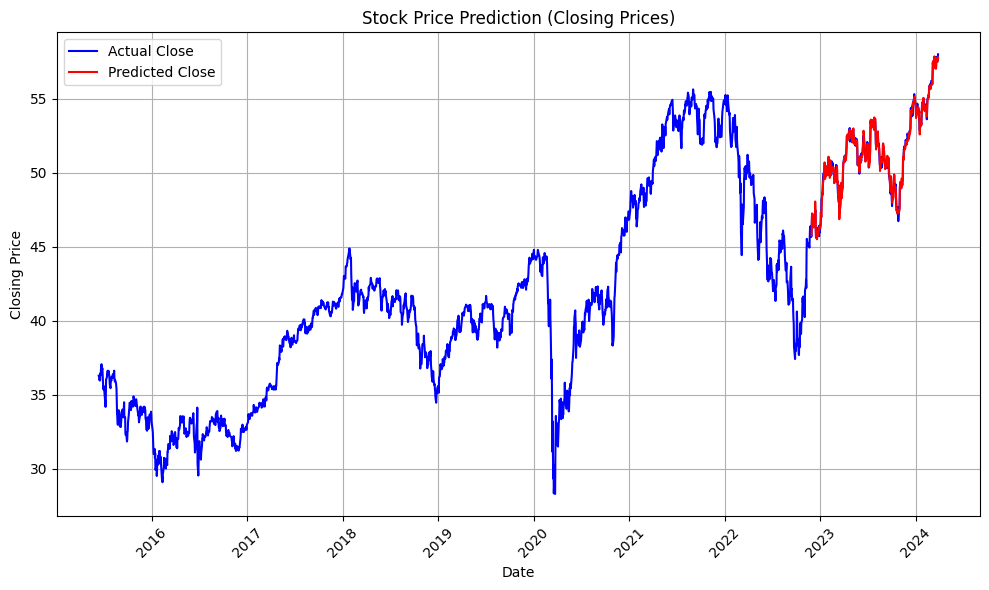

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Datasets to carry out the rest of the study (15-20 Datasets)

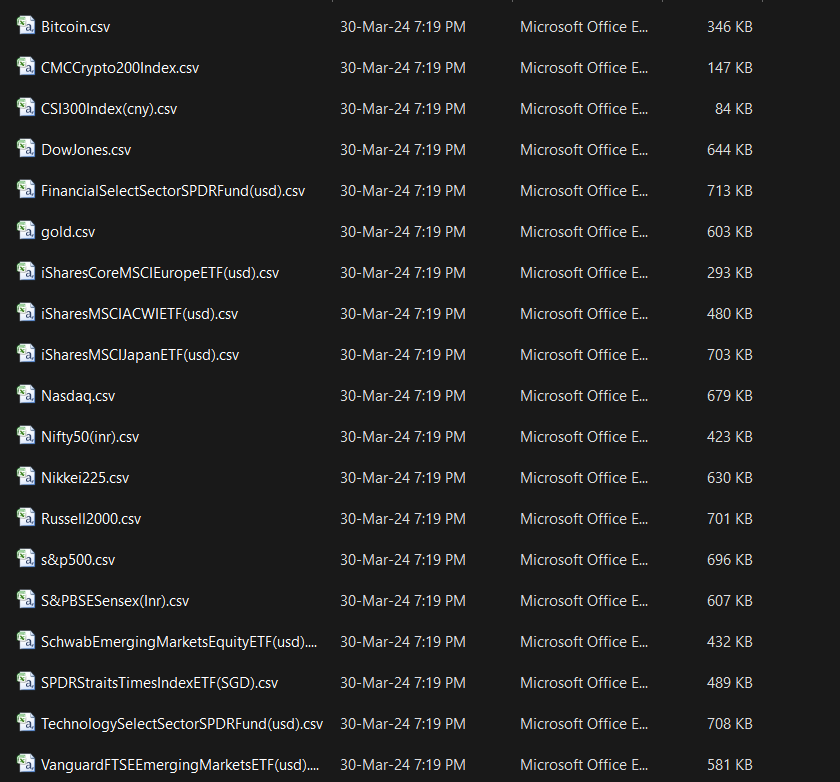

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (GBDT): 0.0062728070745774935
Validation RMSE (GBDT): 0.009202676674176187
Test RMSE (GBDT): 0.005777485664657191


In [44]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (XGBoost): 0.0063164493459601165
Validation RMSE (XGBoost): 0.00930597075147457
Test RMSE (XGBoost): 0.005781465494349711


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
Train RMSE (Random Forest): 0.005206803965326488
Validation RMSE (Random Forest): 0.009276994351137255
Test RMSE (Random Forest): 0.005926120687647576
